## Training Risk-Aware-VAE

### 1: Load MNIST as example

In [1]:
import torch
from dataset import read_mnist
from torch.utils.data import DataLoader

mnist_train, mnist_val, mnist_test = read_mnist()

In [27]:
torch.seed()

44135718258600

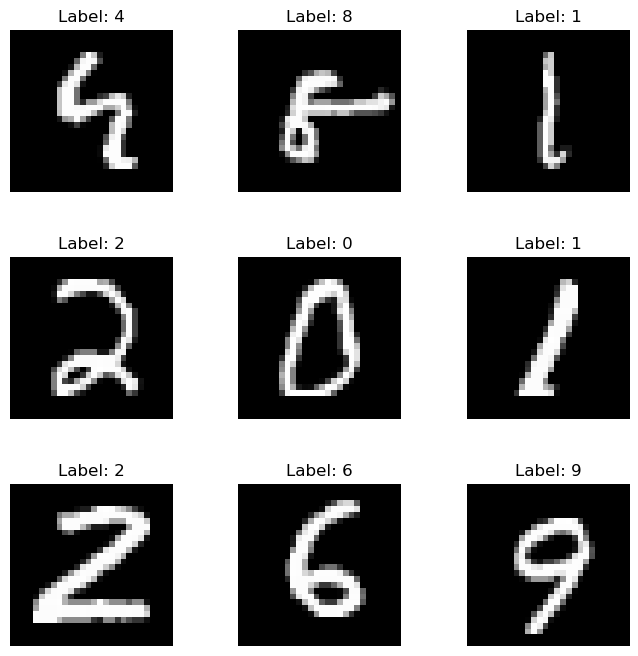

In [2]:
# some visualizations
from utils import visualize_dataset_in_grid

train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))
visualize_dataset_in_grid(train_features, train_labels)

### 2: Vanilla Config

#### 2.1: Vanilla VAE

In [4]:
from backbone import VAE, vanilla_config

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
vae_model = VAE(28 * 28, 20, vanilla_config, device=device, risk_aware="neutral")

# Display model architecture
vae_model.model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=400, out_features=20, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=400, out_features=20, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=20, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [5]:
# Train model
vae_model.fit(mnist_train, mnist_val, epochs=10)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 92.56it/s]


Epoch: 1, train loss: 153.9132, dev loss: 124.8590


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 90.40it/s]


Epoch: 2, train loss: 119.6135, dev loss: 116.1663


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 88.19it/s]


Epoch: 3, train loss: 113.9542, dev loss: 112.3073


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 82.25it/s]


Epoch: 4, train loss: 111.3012, dev loss: 110.5993


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 83.67it/s]


Epoch: 5, train loss: 109.6129, dev loss: 109.1613


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 84.65it/s]


Epoch: 6, train loss: 108.5761, dev loss: 108.5868


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 84.13it/s]


Epoch: 7, train loss: 107.8192, dev loss: 107.9097


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 84.43it/s]


Epoch: 8, train loss: 107.2016, dev loss: 107.6569


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 81.99it/s]


Epoch: 9, train loss: 106.6629, dev loss: 106.8654


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 79.51it/s]


Epoch: 10, train loss: 106.3425, dev loss: 106.7511


In [6]:
# Generate/reconstruct some images
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="gray")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def generate_img(model, z_dim):
    with torch.no_grad():
        z = torch.randn(64, z_dim).cuda()
        sample = model.model.decode(z)

    img_grid = make_grid(sample.view(64, 1, 28, 28).cpu())
    matplotlib_imshow(img_grid, one_channel=True)
    
def reconstruct_img(model, x):    
    with torch.no_grad():
        sample, _, _ = model.model.forward(x.reshape(1, -1).cuda())
    
    imgs = torch.cat((x.view(1, 1, 28, 28).cpu(), sample.view(1, 1, 28, 28).cpu()))
    img_grid = make_grid(imgs)
    matplotlib_imshow(img_grid, one_channel=True)
    plt.show()

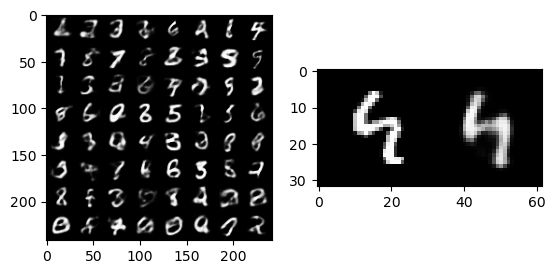

In [7]:
plt.subplot(1, 2, 1)
generate_img(vae_model, 20)
plt.subplot(1, 2, 2)
reconstruct_img(vae_model, train_features[0])

#### 2.2: Risk-seeking VAE

In [8]:
vae_rs = VAE(28 * 28, 20, vanilla_config, device=device, risk_aware="seeking")
vae_rs.model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=400, out_features=20, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=400, out_features=20, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=20, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [9]:
vae_rs.fit(mnist_train, mnist_val, epochs=10)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 87.44it/s]


Epoch: 1, train loss: 120.0635, dev loss: 95.0391


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 79.21it/s]


Epoch: 2, train loss: 89.6640, dev loss: 86.4783


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 70.52it/s]


Epoch: 3, train loss: 84.4938, dev loss: 83.3753


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 70.64it/s]


Epoch: 4, train loss: 82.0584, dev loss: 81.5139


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 68.44it/s]


Epoch: 5, train loss: 80.4743, dev loss: 80.4385


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 70.81it/s]


Epoch: 6, train loss: 79.5632, dev loss: 80.4029


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 71.18it/s]


Epoch: 7, train loss: 79.0290, dev loss: 79.2783


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 68.56it/s]


Epoch: 8, train loss: 78.3501, dev loss: 78.5645


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 69.24it/s]


Epoch: 9, train loss: 77.9617, dev loss: 79.1156


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 69.88it/s]


Epoch: 10, train loss: 77.5781, dev loss: 78.2622


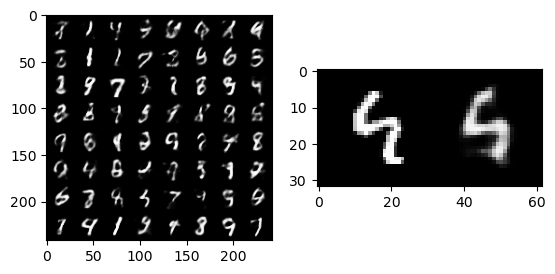

In [10]:
plt.subplot(1, 2, 1)
generate_img(vae_rs, 20)
plt.subplot(1, 2, 2)
reconstruct_img(vae_rs, train_features[0])

#### 2.3: Risk-abiding VAE

In [11]:
vae_ra = VAE(28 * 28, 20, vanilla_config, device=device, risk_aware="abiding")
vae_ra.model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=400, out_features=20, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=400, out_features=20, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=20, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [12]:
vae_ra.fit(mnist_train, mnist_val, epochs=10)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 85.11it/s]


Epoch: 1, train loss: 177.7480, dev loss: 145.1414


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.12it/s]


Epoch: 2, train loss: 138.9652, dev loss: 134.8052


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 67.11it/s]


Epoch: 3, train loss: 132.0837, dev loss: 130.1846


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 68.46it/s]


Epoch: 4, train loss: 128.6634, dev loss: 127.9578


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 69.98it/s]


Epoch: 5, train loss: 126.5296, dev loss: 126.1358


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 69.99it/s]


Epoch: 6, train loss: 125.0411, dev loss: 125.2074


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 68.30it/s]


Epoch: 7, train loss: 123.9533, dev loss: 124.5278


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 64.17it/s]


Epoch: 8, train loss: 123.1369, dev loss: 123.6460


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 66.52it/s]


Epoch: 9, train loss: 122.4411, dev loss: 123.3272


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 68.75it/s]


Epoch: 10, train loss: 121.9698, dev loss: 123.2557


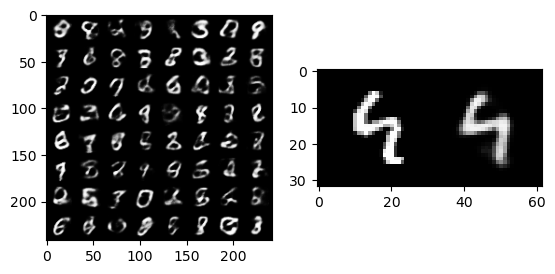

In [13]:
plt.subplot(1, 2, 1)
generate_img(vae_ra, 20)
plt.subplot(1, 2, 2)
reconstruct_img(vae_ra, train_features[0])

### 3: VAE with a proven config

Config borrowed from https://github.com/lyeoni/pytorch-mnist-VAE

In [14]:
config = {
    "enc": [512, 256],
    "mu_enc": [],
    "var_enc": [],
    "dec": [256, 512],
    "enc_ac": torch.nn.ReLU,  # enc_ac only uses the same activation
    "dec_ac": torch.nn.ReLU,  # we allow more activation here
    "final_ac": torch.nn.Sigmoid,  # activation on the final level
}


In [15]:
vae_model = VAE(28 * 28, 2, config, device=device, risk_aware="neutral")
vae_model.model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

In [16]:
vae_model.fit(mnist_train, mnist_val, epochs=10)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:08<00:00, 84.06it/s]


Epoch: 1, train loss: 181.2149, dev loss: 165.7636


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 78.16it/s]


Epoch: 2, train loss: 161.7967, dev loss: 157.5797


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 66.65it/s]


Epoch: 3, train loss: 155.6317, dev loss: 153.2334


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 70.05it/s]


Epoch: 4, train loss: 152.0821, dev loss: 150.9014


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 70.46it/s]


Epoch: 5, train loss: 149.7770, dev loss: 149.6507


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 68.47it/s]


Epoch: 6, train loss: 148.2638, dev loss: 147.6339


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 66.15it/s]


Epoch: 7, train loss: 146.8789, dev loss: 146.8671


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 67.57it/s]


Epoch: 8, train loss: 145.8518, dev loss: 146.1576


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.34it/s]


Epoch: 9, train loss: 145.1531, dev loss: 145.2241


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 65.44it/s]


Epoch: 10, train loss: 144.3410, dev loss: 144.7694


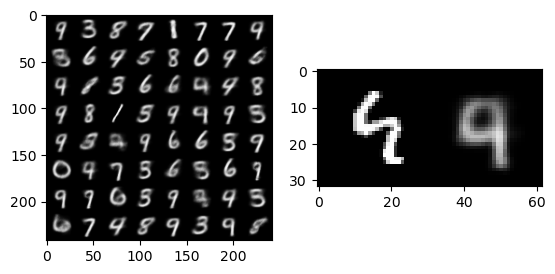

In [17]:
plt.subplot(1, 2, 1)
generate_img(vae_model, 2)
plt.subplot(1, 2, 2)
reconstruct_img(vae_model, train_features[0])

In [21]:
vae_rs = VAE(28 * 28, 2, config, device=device, risk_aware="seeking")
vae_rs.model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

In [22]:
vae_rs.fit(mnist_train, mnist_val, epochs=10)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 79.76it/s]


Epoch: 1, train loss: 135.7340, dev loss: 119.1382


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 64.23it/s]


Epoch: 2, train loss: 115.1833, dev loss: 112.8103


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 63.00it/s]


Epoch: 3, train loss: 110.5123, dev loss: 110.1549


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 63.69it/s]


Epoch: 4, train loss: 107.9568, dev loss: 107.4886


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 64.18it/s]


Epoch: 5, train loss: 106.1512, dev loss: 106.8037


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 64.20it/s]


Epoch: 6, train loss: 105.0283, dev loss: 105.3611


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 62.55it/s]


Epoch: 7, train loss: 104.1528, dev loss: 104.3097


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 62.40it/s]


Epoch: 8, train loss: 103.2966, dev loss: 104.0035


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 62.00it/s]


Epoch: 9, train loss: 102.6248, dev loss: 103.0139


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 62.12it/s]


Epoch: 10, train loss: 102.0153, dev loss: 102.6172


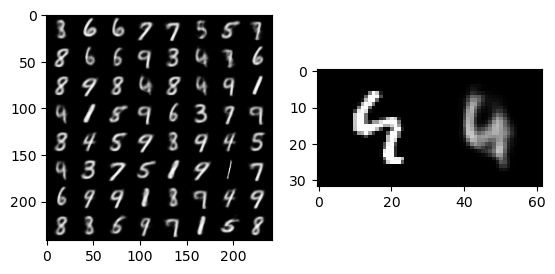

In [23]:
plt.subplot(1, 2, 1)
generate_img(vae_rs, 2)
plt.subplot(1, 2, 2)
reconstruct_img(vae_rs, train_features[0])

In [24]:
vae_ra = VAE(28 * 28, 2, config, device=device, risk_aware="abiding")
vae_ra.model

VNet(
  (enc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (mu_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (var_enc): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (dec): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

In [25]:
vae_ra.fit(mnist_train, mnist_val, epochs=10)

100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 66.13it/s]


Epoch: 1, train loss: 215.5354, dev loss: 197.1461


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.32it/s]


Epoch: 2, train loss: 193.7027, dev loss: 190.6050


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:13<00:00, 56.84it/s]


Epoch: 3, train loss: 189.0739, dev loss: 187.1033


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.90it/s]


Epoch: 4, train loss: 186.2234, dev loss: 184.3277


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.17it/s]


Epoch: 5, train loss: 184.3126, dev loss: 184.7896


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 62.58it/s]


Epoch: 6, train loss: 182.7812, dev loss: 182.0700


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 61.70it/s]


Epoch: 7, train loss: 181.6006, dev loss: 181.1588


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:11<00:00, 63.49it/s]


Epoch: 8, train loss: 180.6741, dev loss: 180.0864


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 62.50it/s]


Epoch: 9, train loss: 179.5767, dev loss: 179.4307


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.13it/s]


Epoch: 10, train loss: 178.8883, dev loss: 179.5744


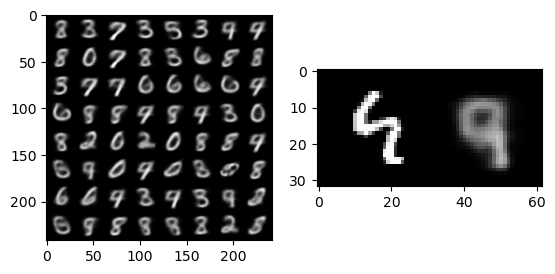

In [26]:
plt.subplot(1, 2, 1)
generate_img(vae_ra, 2)
plt.subplot(1, 2, 2)
reconstruct_img(vae_ra, train_features[0])